# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/Documentos/Mestrado/ACOPResults/acopEnv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
  9%|▉         | 4/43 [00:00<00:01, 35.32it/s]

[200, 179, 219, 199, 209, 219, 1239, 1238, 976, 179, 809, 919, 219]
2 chs: 200 entries
3 chs: 179 entries
4 chs: 219 entries
5 chs: 199 entries
6 chs: 209 entries
7 chs: 219 entries
8 chs: 1239 entries
9 chs: 1238 entries
10 chs: 976 entries
15 chs: 179 entries
20 chs: 809 entries
30 chs: 919 entries
40 chs: 219 entries


 74%|███████▍  | 32/43 [00:07<00:03,  2.82it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:08<00:01,  4.14it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:00<00:02, 12.96it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:06<00:01,  4.58it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:07<00:01,  3.55it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:00<00:02, 13.50it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:05<00:00,  5.53it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:06<00:00,  7.00it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]

sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict)

{'BaggingRegressor': 8.060487119628824, 'LassoCV': 8.066327019669794, 'ElasticNetCV': 8.069206665488005, 'GradientBoostingRegressor': 8.06946396723279, 'XGBRegressor': 8.070446693274501}


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [13]:
import matplotlib.pyplot as plt

def plotGainBoxPlots(data):
    plt.boxplot(data)
    plt.ylabel("Mean Absolute error (dB)", fontsize = 8)
    
    plt.suptitle("Gain Test error", fontsize = 16)
    plt.legend(strategyArray, handlelength = 0, bbox_to_anchor=(1.6, 1), loc = "right")

    plt.show()

def plotLossBoxPlots(data):
    plt.boxplot(data)
    plt.ylabel("Mean Absolute error (dB)", fontsize = 8)
    
    plt.suptitle("Loss Test error", fontsize = 16)
    plt.legend(strategyArray, handlelength = 0, bbox_to_anchor=(1.6, 1), loc = "right")

    plt.show()

# Building the models

In [5]:
X, y = data.loadDataset()
X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = 0)

count = 1

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor

extra_tree = ExtraTreeRegressor(criterion = "mse", random_state=0)
model      = MultiOutputRegressor(BaggingRegressor(base_estimator = extra_tree, 
                                                   n_estimators   = 100,
                                                   random_state   = 0))

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - BaggingRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[24.  1. 20.  1.] [24.          0.94909245 20.4276402   2.58694234]


In [7]:
from sklearn.linear_model import LassoCV

model = MultiOutputRegressor(LassoCV())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - LassoCV".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[24.  1. 20.  1.] [23.99803215  0.94294406 20.36801095  2.45290888]


In [8]:
from sklearn.linear_model import ElasticNetCV

model = MultiOutputRegressor(ElasticNetCV())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - ElasticNetCV".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[24.  1. 20.  1.] [23.9975908   0.94327575 20.36384989  2.4364783 ]


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

model = MultiOutputRegressor(GradientBoostingRegressor())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - GradientBoostingRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[24.  1. 20.  1.] [23.99959314  0.95170758 20.42454155  2.55606678]


In [10]:
from xgboost import XGBRegressor

model = MultiOutputRegressor(XGBRegressor())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - XGBRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[24.  1. 20.  1.] [23.999977   0.9431392 20.422804   2.5608406]


In [11]:
from sklearn.dummy import DummyRegressor

model = MultiOutputRegressor(DummyRegressor())

model.fit(X_train, y_train)

result = model.predict(X_test)

print(y_test[0], result[0])

strategyArray.append("{} - DummyRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1

[24.  1. 20.  1.] [22.06449631  2.62407862 21.2536855   1.43120393]


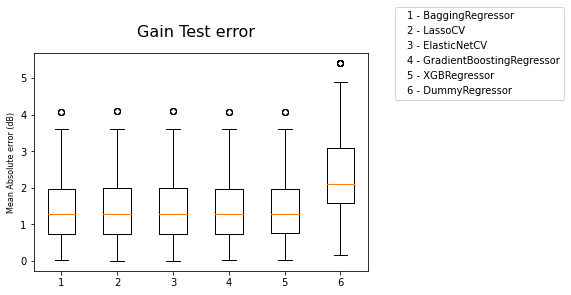

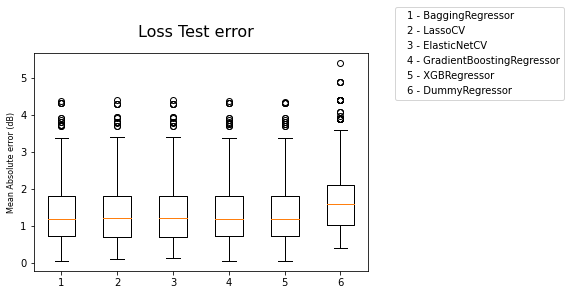

In [14]:
plotGainBoxPlots(errorArray[0])
plotLossBoxPlots(errorArray[1])